<a href="https://colab.research.google.com/github/gtvastella/si101a/blob/master/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#AULA 1

# *banco de dados retirado do Kaggle*

In [3]:
import pandas as pd
import seaborn as sns

n = pd.read_csv("brazil_covid19novo.csv", index_col=2)
#lendo o banco de dados

n.head(27)
#apresentação do banco de dados, mostrando os casos em cada estado, por região, do Brasil por dia.
#o head(27) foi devido aos 26 estados brasileiros mais o distrito federal.
#o banco foi editado para mostrar apenas de 1 de abril até 10 de maio, para maior relevância.

,date,region,cases,deaths
state,,,,
Distrito Federal,4/1/2020,Centro-Oeste,355,3
Goiás,4/1/2020,Centro-Oeste,71,1
Mato Grosso,4/1/2020,Centro-Oeste,27,0
Mato Grosso do Sul,4/1/2020,Centro-Oeste,51,1
Alagoas,4/1/2020,Nordeste,18,1
Bahia,4/1/2020,Nordeste,246,2
Ceará,4/1/2020,Nordeste,444,8
Maranhão,4/1/2020,Nordeste,52,1
Paraíba,4/1/2020,Nordeste,20,1


In [4]:
n.loc[n.date == "5/1/2020"].cases.sum()
#aqui é exibido o número total de casos de covid-19 no Brasil até a data de 01/05/2020.

91299

In [0]:
n.loc[n.date == "5/1/2020"].deaths.sum()
#aqui é exibido o número total de mortes por covid-19 no Brasil até a data de 01/05/2020.

6329

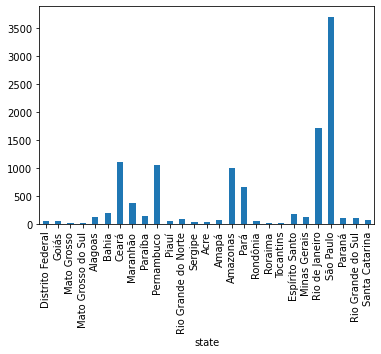

In [0]:

n.loc[n.date == "5/10/2020"].deaths.plot.bar()

#aqui é exibido um gráfico de barra que mostra o número de mortes por estado até a data de 10/05/2020.


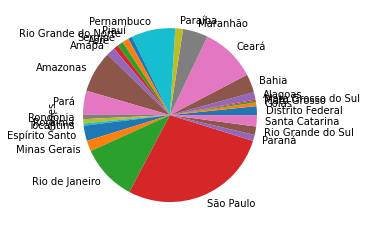

In [0]:

n.loc[n.date == "5/10/2020"].cases.plot.pie()
#aqui é exibido um gráfico de pizza que mostra o número de casos por estado até a data de 10/05/2020.

In [0]:
n.loc[n.date == "5/10/2020"].deaths>=500
#aqui é exibido estados que possuiam 500 mortes ou mais por covid-19 até o dia 10/05/2020, sinalizados como true

state
Distrito Federal       False
Goiás                  False
Mato Grosso            False
Mato Grosso do Sul     False
Alagoas                False
Bahia                  False
Ceará                   True
Maranhão               False
Paraíba                False
Pernambuco              True
Piauí                  False
Rio Grande do Norte    False
Sergipe                False
Acre                   False
Amapá                  False
Amazonas                True
Pará                    True
Rondônia               False
Roraima                False
Tocantins              False
Espírito Santo         False
Minas Gerais           False
Rio de Janeiro          True
São Paulo               True
Paraná                 False
Rio Grande do Sul      False
Santa Catarina         False
Name: deaths, dtype: bool

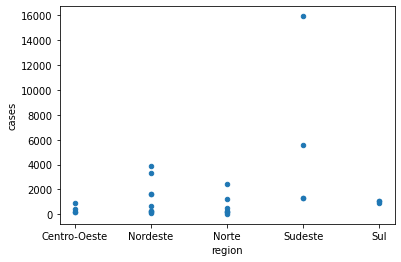

In [0]:
n.loc[n.date == "4/22/2020"].plot.scatter(x='region', y='cases')

#aqui é exibido um gráfico do tipo scatter mostrando os casos totais por região exatamente do dia 22 de abril
#de 2020.

In [0]:
#AULA 2

In [0]:
from google.colab import files
n.loc[n.date=="5/10/2020"].loc[:,['cases', 'deaths','region']].to_csv('teste.csv')
files.download('teste.csv')
#aqui é filtrado o banco de dados e criado um novo a partir desse, guardando apenas as colunas
#deaths, cases e region (mortes e região) do dia 10/05/2020. Em seguida p arquivo é salvo e baixado para o computador que
#executou o código

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
tt = pd.read_csv("teste.csv")
tm= tt.groupby(['region']).sum()
tm.head()
#aqui é montado, a partir do método groupby, um novo dataset que soma a mortes e casos por regiões com o banco de dados criado anteriormente. 
#Assim, é possível obter o número total de mortes e casos, ainda no dia 10/05/2020, porém por região e não por estado.

,cases,deaths
region,,
Centro-Oeste,4656,118
Nordeste,52700,3167
Norte,27195,1844
Sudeste,70342,5723
Sul,7806,271


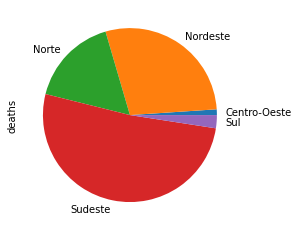

In [7]:
tm.deaths.plot.pie()

#aqui exibimos um gráfico de pizza, baseado no dataset anterior, exibindo a distribuição de mortes por regiões.

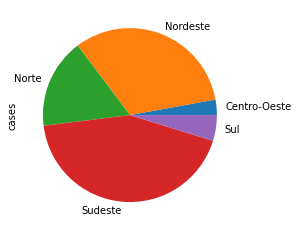

In [8]:
tm.cases.plot.pie()

#aqui exibimos um gráfico de pizza, baseado no dataset anterior, exibindo a distribuição de casos por regiões.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


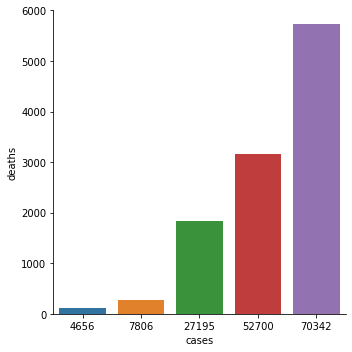

In [10]:

sns.factorplot(x="cases", y="deaths", kind="bar", data=tm)

#aqui mostramos um gráfico factorplot com todas as mortes separadas por região na data de 10/05/2020

In [0]:
#AULA 3

In [0]:
n2 = pd.read_csv("brazil_covid19novo.csv")

In [13]:
lista = n2.loc[n2.region == "Sudeste"]
lista.head(12)

#aqui mostramos uma lista com os casos de todos os estados da região sudeste nos 3 primeiros dias de abril. note que, como a região é constituída por 4estados
#então, para cada estado seria necessario exibir 4 linhas e totalizando 12 linhas para 3 dias.


,date,region,state,cases,deaths
20,4/1/2020,Sudeste,Espírito Santo,96,0
21,4/1/2020,Sudeste,Minas Gerais,314,3
22,4/1/2020,Sudeste,Rio de Janeiro,832,28
23,4/1/2020,Sudeste,São Paulo,2981,164
47,4/2/2020,Sudeste,Espírito Santo,120,1
48,4/2/2020,Sudeste,Minas Gerais,370,4
49,4/2/2020,Sudeste,Rio de Janeiro,992,41
50,4/2/2020,Sudeste,São Paulo,3506,188
74,4/3/2020,Sudeste,Espírito Santo,139,4
75,4/3/2020,Sudeste,Minas Gerais,397,6


In [14]:
X_lista = lista.loc[: ,  ["cases",	"deaths"] ]
X_lista.head(4)


#aqui fazemos nosso banco restringindo apenas os casos e mortes, sem determinar o estado, já que esse é nosso alvo.

,cases,deaths
20,96,0
21,314,3
22,832,28
23,2981,164


In [15]:
y_lista = lista.state
y_lista.head(4)

#aqui fazemos um banco restringindo apenas os estados, sem determinar mortes e casos, já que isso servirá para  determinar o alvo(estado)

20    Espírito Santo
21      Minas Gerais
22    Rio de Janeiro
23         São Paulo
Name: state, dtype: object

In [0]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

ETC = ExtraTreesClassifier()
#escolhemos o modelo ExtraTreesClassifier

Xtrain, Xtest, ytrain, ytest = train_test_split(X_lista, y_lista, random_state=74)
#fazemos nosso "treino" baseado nos bancos criados anteriormentes

In [0]:
ETC.fit(Xtrain, ytrain)
y_ETC = ETC.predict(Xtest)
#utilizamos o método de predição

In [23]:
from sklearn.metrics import accuracy_score

accuracy_score(ytest, y_ETC)*100 

#determinamos a precisão final em porcentagem do modelo ETC

72.5

In [21]:
y_ETC
#o que foi inferido

array(['São Paulo', 'Espírito Santo', 'Espírito Santo', 'Rio de Janeiro',
       'Rio de Janeiro', 'São Paulo', 'Rio de Janeiro', 'Minas Gerais',
       'Minas Gerais', 'Espírito Santo', 'Minas Gerais', 'Espírito Santo',
       'Rio de Janeiro', 'Minas Gerais', 'Rio de Janeiro', 'Minas Gerais',
       'Espírito Santo', 'Minas Gerais', 'Rio de Janeiro', 'São Paulo',
       'Rio de Janeiro', 'Rio de Janeiro', 'Rio de Janeiro',
       'Minas Gerais', 'Espírito Santo', 'Espírito Santo', 'Minas Gerais',
       'Espírito Santo', 'São Paulo', 'São Paulo', 'Minas Gerais',
       'Minas Gerais', 'Minas Gerais', 'Rio de Janeiro', 'Minas Gerais',
       'Rio de Janeiro', 'Espírito Santo', 'Espírito Santo', 'São Paulo',
       'São Paulo'], dtype=object)

In [22]:
ytest
#o "gabarito" do teste

994     Rio de Janeiro
938     Espírito Santo
722     Espírito Santo
967     Rio de Janeiro
750       Minas Gerais
941          São Paulo
913     Rio de Janeiro
211     Rio de Janeiro
723       Minas Gerais
317     Espírito Santo
129       Minas Gerais
992     Espírito Santo
562     Rio de Janeiro
103     Rio de Janeiro
616     Rio de Janeiro
642       Minas Gerais
560     Espírito Santo
884     Espírito Santo
455          São Paulo
1076         São Paulo
644          São Paulo
535     Rio de Janeiro
1048    Rio de Janeiro
912       Minas Gerais
966       Minas Gerais
128     Espírito Santo
76      Rio de Janeiro
101     Espírito Santo
752          São Paulo
563          São Paulo
399       Minas Gerais
22      Rio de Janeiro
184     Rio de Janeiro
481     Rio de Janeiro
480       Minas Gerais
805     Rio de Janeiro
155     Espírito Santo
74      Espírito Santo
104          São Paulo
968          São Paulo
Name: state, dtype: object